## Important Note 
Before you start the development, we strongly recommend you look at the rubric in your classroom, against which the human Mentor will review your submission. Your submission must satisfy all rubric criteria to pass the project; otherwise, the Mentor may ask you to re-submit. The rubric is available on the **Project Rubric** page towards the end of the current lessons. 

By carefully following the tips provided in this notebook, you can meet all rubric criteria and successfully complete the project.  If needed, you can use **Google Translate** to translate the tips for better understanding. Once you have met all rubric requirements, be sure to:  
- Remove all instructional tips from the current notebook, including the current Tip.  
- Replace placeholder text, such as `yourname`, with your actual details.  

This will ensure your submission is polished and ready for evaluation.

**Delete this cell, once you have met all rubric requirements**.


<!-- # Part I - Ford go Bike Data -->
<!-- ## by Mohamed Samir -->

## Introduction

> Introduce the dataset

>**Rubric Requirement**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Requirement**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Requirement**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

## Preliminary Wrangling

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For calculating distance between 2 points of logitude and latitude
import haversine as hs   
from haversine import Unit



> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [13]:
df = pd.read_csv("./Datasets/201902-fordgobike-tripdata.csv")

In [14]:
print(df.shape)
print("--------------------")
print(df.dtypes)
print("--------------------")
print(df.head(2))

(183412, 16)
--------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
--------------------
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1          

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Check for duplicates

In [26]:
# No duplicates
df.duplicated().sum()

np.int64(0)

### What is the structure of your dataset?
It has 15 columns structured as the following

1. Numeric columns
    - duration_sec
    - start station id (`Has NANs`)
    - start_station_latitude
    - start_station_longitude
    - end_station_id (`Has NANs`)
    - end_station_latitude
    - end_station_longitude
    - bike_id
    - member_birth_year (`Has NANs`)
2. Objects columns
    - start_time 
    - end_time  
    - start_station_name (`Has NANs`)
    - end_station_name (`Has NANs`)
    - user_type
    - member_gender (`Has NANs`)
    - bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

I am interested in most of the features. This is the list of interests 

1. Time `duration_sec`
2. Stations information `start_station` & `end_station`
3. Member information `member_gender` & `member_birth_year`
4. User information `user_type`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. Trip duration in seconds
   - I can create another feature from it to minutes or hours.
2. Stations information
   - I can get information for which stations are most active and more.
3. User information
   - Analysing each user information which would give me deep insight into users
4. Member information
   - Would give me better understanding for members activities which would give me better understandings of customer needs 


### Feature Engineering 

In [17]:
def convert_to_distance():
    distances = []
    iterator = df.shape[0]
    for i in range(iterator):
        distance = get_distance(df['start_station_latitude'][i], df['start_station_longitude'][i], df['end_station_latitude'][i], df['end_station_longitude'][i])
        distances.append(distance)
    distances_Series = pd.Series(distances)
    df['distance'] = distances_Series
def get_distance(lat1, lon1, lat2, lon2):
    """
    Distance Calculation Function
        - This function takes in the latitude and longitude values of two points and returns the distance between them in meters.
    ## Parameters:
    lat1: float
        Latitude of the first point.
    lon1: float
    lat2: float
    lon2: float
    ## Output:
    float
        The distance between the two points in meters.
    """

    loc1=(lat1, lon1)
    loc2=(lat2, lon2)
    return hs.haversine(loc1, loc2, unit=Unit.METERS)


def time_classification(x):
    """
    Time Classification Function
     - This function takes in a time value in seconds and returns a string indicating the classification of the time value.
    ## Parameters:
    x: int
        The time value in seconds.
    ## Output: 
    str
        One of the three values: 'Seconds', 'Minutes', 'Hours'
    """

    if(x < 60):
        return 'Seconds'
    elif(x < 3600):
        return 'Minutes'
    else:
        return 'Hours'

def timeConvert_hours(x):    
    if(x):
        if(x > 3600):
            return x/3600
    else:
        return np.nan
    
def timeConvert_minutes(x):    
    if(x):
        if(x < 3600):
            return x/60
    else:
        return np.nan

df['time_hours'] = df['duration_sec'].apply(timeConvert_hours)
df['time_minutes'] = df['duration_sec'].apply(timeConvert_minutes)

df['time_classification'] = df['duration_sec'].apply(time_classification)
df['age'] = df['member_birth_year'].apply(lambda x: 2025 - x)
convert_to_distance()

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Requirement**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Requirement**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Requirement**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

#### Question

What is the range and are there outliers for each of the following?

1. Members birth years
2. Time of trip duration in minutes
3. Time of trip duration in hours

#### Vizualization

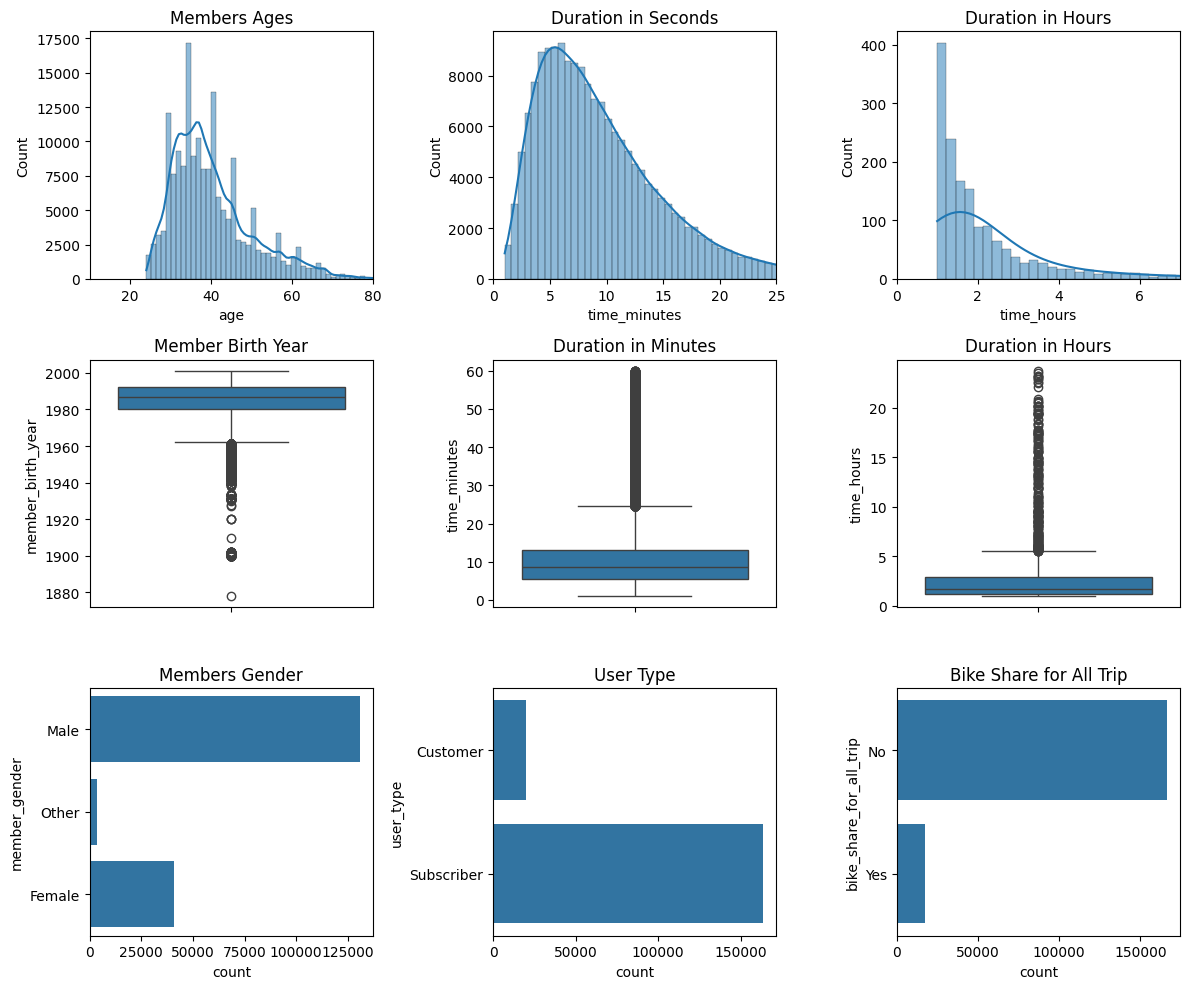

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 2 rows and 2 columns
ax_flat = axes.flatten()  # Convert axes to a 1D array.

# Histograms
sns.histplot(df['age'], bins=100, ax=ax_flat[0], kde=True)
ax_flat[0].set_title('Members Ages')
ax_flat[0].set_xlim(10, 80)

sns.histplot(df['time_minutes'], bins=100, ax=ax_flat[1], kde=True)
ax_flat[1].set_title('Duration in Seconds')
ax_flat[1].set_xlim(0, 25)

sns.histplot(df['time_hours'], bins=100, ax=ax_flat[2], kde=True)
ax_flat[2].set_title('Duration in Hours')
ax_flat[2].set_xlim(0, 7)

# Box Plots
sns.boxplot(df['member_birth_year'], ax=ax_flat[3])
ax_flat[3].set_title('Member Birth Year')

sns.boxplot(df['time_minutes'], ax=ax_flat[4])
ax_flat[4].set_title('Duration in Minutes')

sns.boxplot(df['time_hours'], ax=ax_flat[5])
ax_flat[5].set_title('Duration in Hours')


# Count Plots
sns.countplot(df['member_gender'], ax=ax_flat[6] )
ax_flat[6].set_title('Members Gender')

sns.countplot(df['user_type'], ax=ax_flat[7])
ax_flat[7].set_title('User Type')

sns.countplot(df['bike_share_for_all_trip'], ax=ax_flat[8])
ax_flat[8].set_title('Bike Share for All Trip')


plt.tight_layout()  # Adjusts subplot parameters to fit the figure area.
plt.show()

#### Observations

1. Members
    - For members ages the range is between 20s and 40s, there are some outliers.
    - Great amount of the members are males.
2. Time
   
    - Most trips durations (in hours) are between 1 and 3 hours. However, there are many outliers.
    - Most trips durations (in minutes) are between 5 to 15 minutes. However, there are also many outliers.
3. Users
    - Great amount of users are subscribers.
    - Only few amount of users do bike sharing

#### Questions
1. What is the distance distribution for trips?
2. What is the number of trips less than one hour? 

#### Vizualization

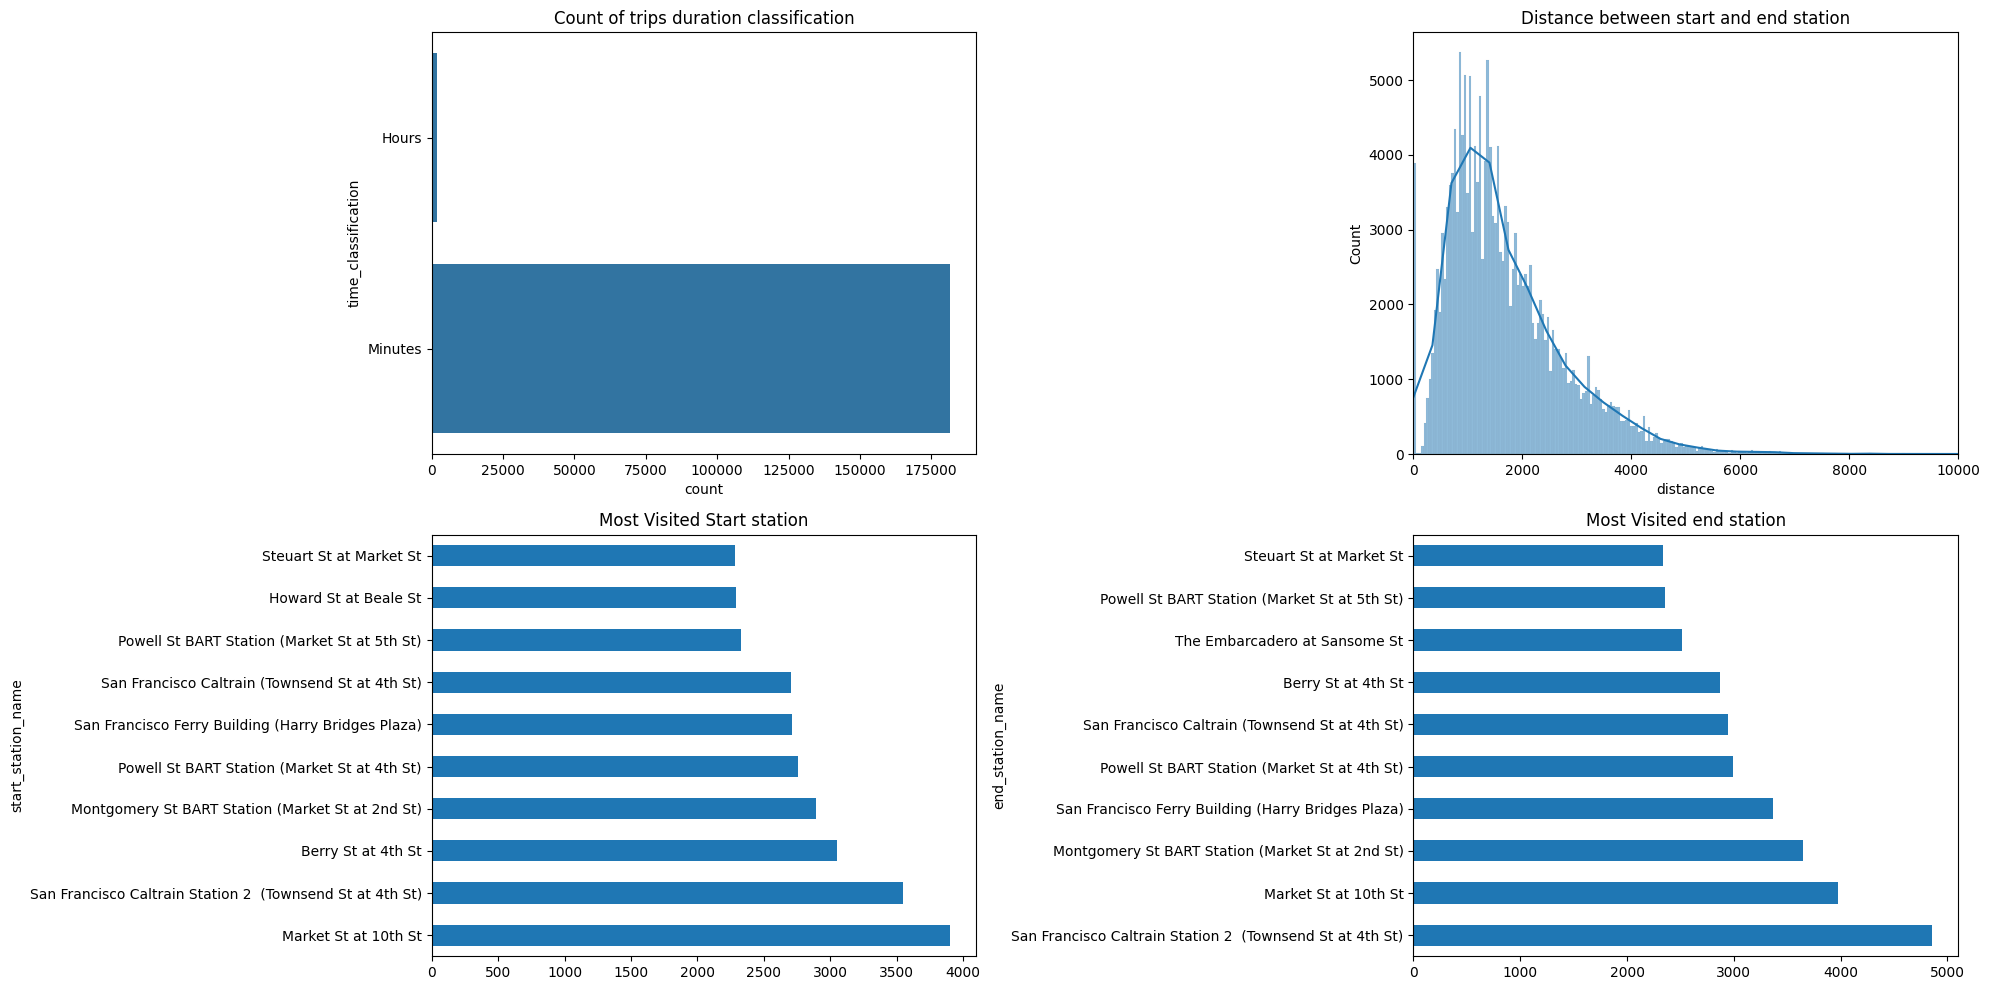

In [53]:
figs, ax = plt.subplots(2, 2, figsize=(12, 5))

ax_flat = ax.flatten()

sns.countplot(df['time_classification'], ax=ax_flat[0])   
ax_flat[0].set_title("Count of trips duration classification")

sns.histplot(df['distance'], ax=ax_flat[1], kde=True)   
ax_flat[1].set_title('Distance between start and end station')
ax_flat[1].set_xlim(0, 10000)

df['start_station_name'].value_counts(ascending=False).head(10).plot(kind='barh', title='Most Visited Start station', ax=ax_flat[2], figsize=(20, 10))
df['end_station_name'].value_counts(ascending=False).head(10).plot(kind='barh', title='Most Visited end station', ax=ax_flat[3], figsize=(20, 10))

plt.tight_layout()

Time classification percentages 

In [ ]:
# Normalize to get the percentage
df['time_classification'].value_counts(normalize=True)

time_classification
Minutes    0.990677
Hours      0.009323
Name: proportion, dtype: float64

#### Observations
1. Time
    - `99%` of the trips don't exceed 1 hour.
2. Distance
    - The trips distances is between `1km` and `3km` 
3. Start Stations
    - The most visited start station is `Market St at 10th St`
4. End Stations
    - The most visited end station is `San Francisco Caltrain Station 2`

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
#### Unusual point
1. That the majority of the trips were less than one hour.

#### Dataset transformations 
Those are the transformation done.

1. Converting positional points
    - Converted the Start Station(long, lat) End Station(long  lat) points into distance in meters. Done using the `convert_to_distance` & `get_distance` functions.
2. Time Conversions
    - Converted time in seconds to hours into new `time_hours` column. Utilized the `timeConvert_hours` function.
    - Also converted time in seconds to minutes if its less than an hour. Used the `timeConvert_minutes`.

3. Classified trips 
    - Classified trips according to duration, so i created another column that has values of "Minutes" or "Hours". Done using the `time_classification` function.
4. Created `age` column from `member_birth_year` using lambda funtion.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> **Rubric Requirement**: Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Requirement**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Requirement**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
> **Rubric Requirement**: You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> **Rubric Requirement**: Create a list of summary findings to make it easy to review.

### Remove all **Rubric Requirement** text 
Remove all **Rubric Requirement** text mentioned above, as well the text below, before you convert this notebook to PDF/HTML.


>At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

